# PRCP-1018-BikeRental

# import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

# input data

In [2]:
data = pd.read_csv('hour.csv')

In [3]:
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
data.season.value_counts()

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

In [8]:
data.weekday.value_counts()

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64

In [9]:
data.workingday.value_counts()

workingday
1    11865
0     5514
Name: count, dtype: int64

In [10]:
data.hum.value_counts()

hum
0.88    657
0.83    630
0.94    560
0.87    488
0.70    430
       ... 
0.12      1
0.08      1
0.10      1
0.97      1
0.91      1
Name: count, Length: 89, dtype: int64

In [11]:
data.hum.value_counts()

hum
0.88    657
0.83    630
0.94    560
0.87    488
0.70    430
       ... 
0.12      1
0.08      1
0.10      1
0.97      1
0.91      1
Name: count, Length: 89, dtype: int64

In [12]:
0 in data.hum

True

In [13]:
0 in data.temp

True

In [14]:
0 in data.atemp

True

In [15]:
0 in data.windspeed

True

In [16]:
data.drop('instant', axis=1, inplace=True)

In [17]:
# Convert 'dteday' column to datetime objects
data['dteday'] = pd.to_datetime(data['dteday'])

# Extract day from datetime objects
data['dteday'] = data['dteday'].dt.day

In [18]:
data

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [77]:
for i in data.columns:
    plt.figure(figsize=(5,10))
    sns.histplot(data, x=i, kde=True)
    plt.xlabel(i)
    plt.ylabel('count')

AttributeError: 'dict' object has no attribute 'columns'

In [20]:
0 in data.temp

True

In [21]:
(data.temp==0.02).sum()

17

In [22]:
(data.atemp==0).sum()

2

In [23]:
data.temp.corr(data['atemp'])

0.9876721390396492

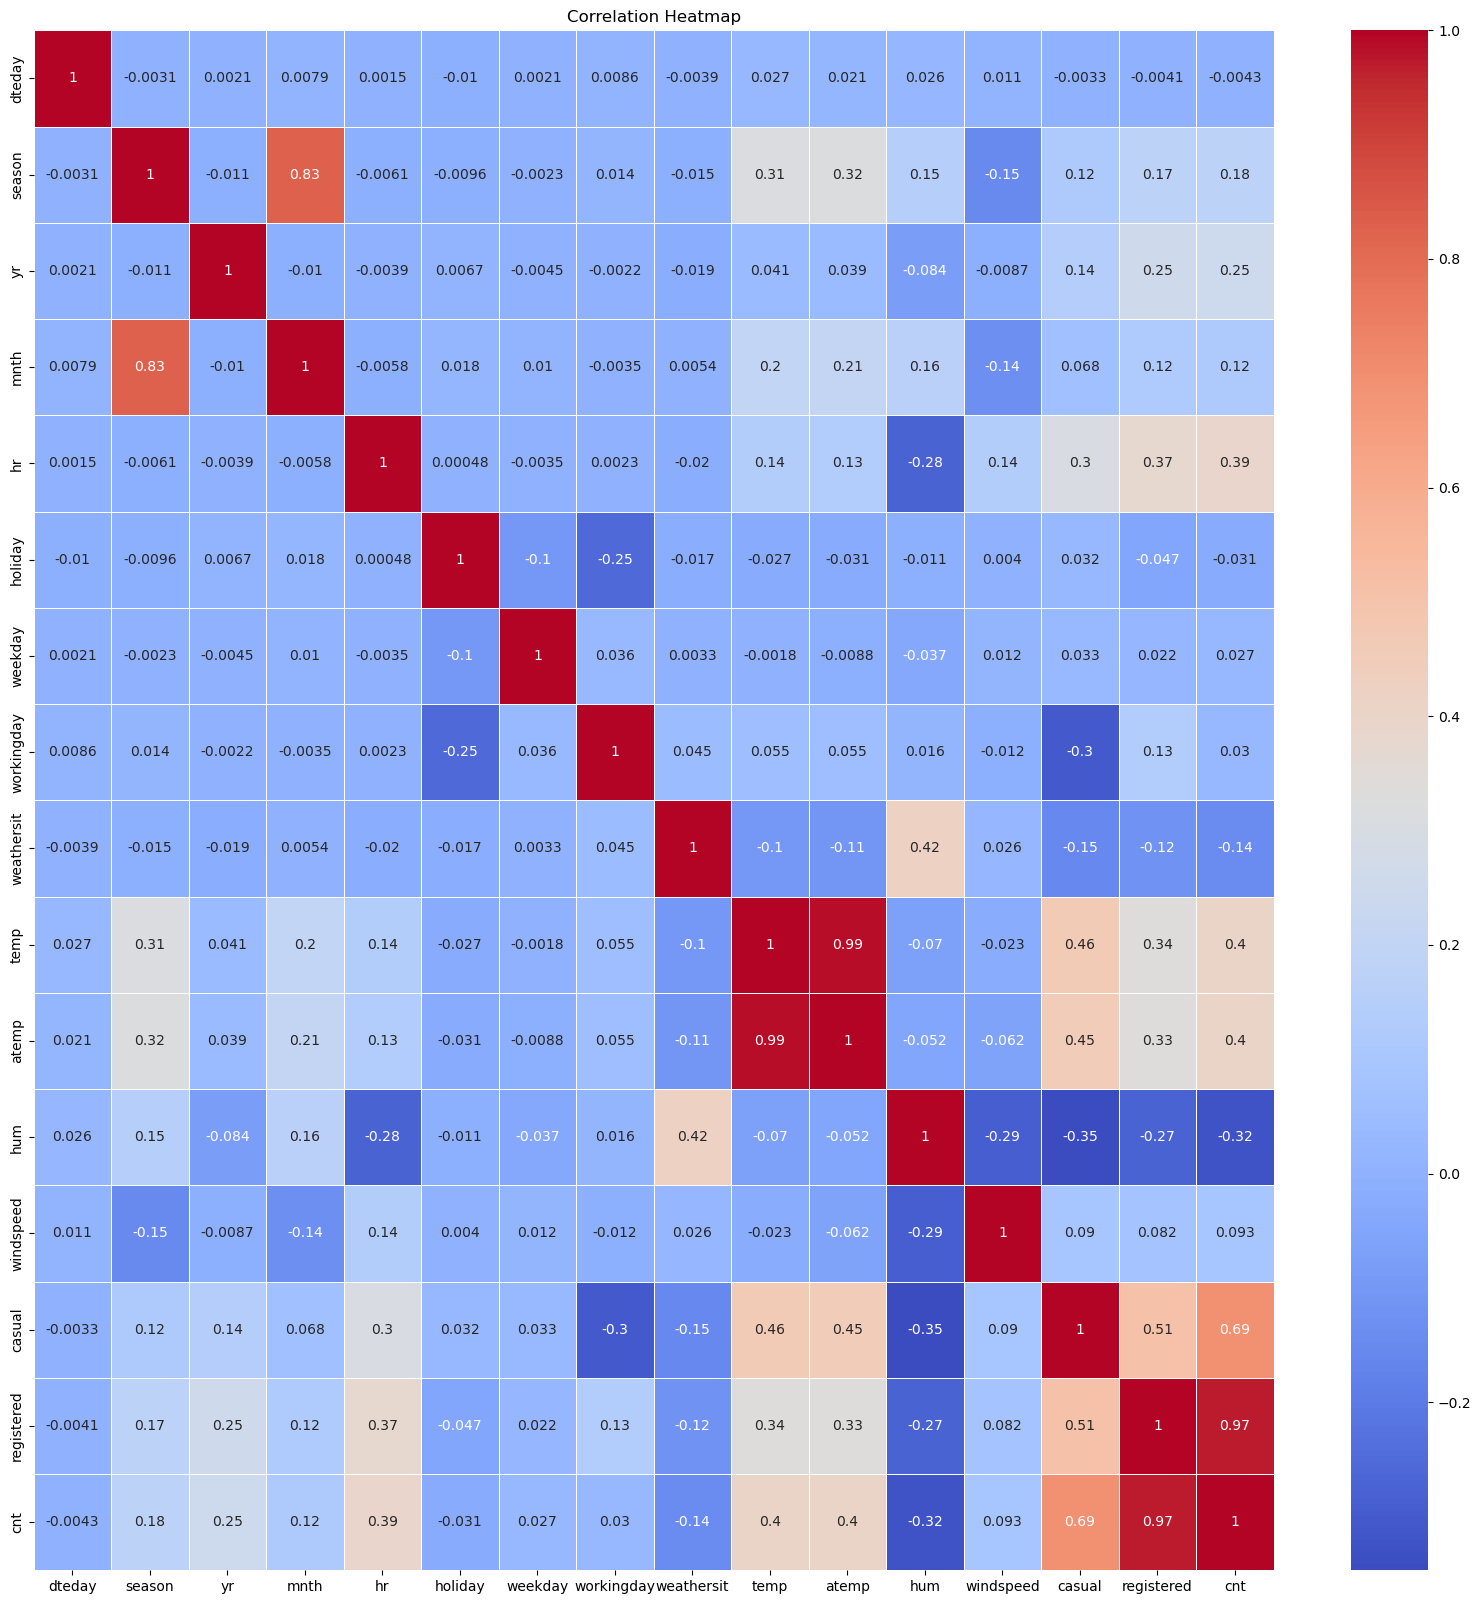

In [24]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
data.drop('atemp', axis=1, inplace=True)

In [26]:
import pandas as pd

# Assuming 'data' is your DataFrame with columns 'casual', 'registered', and 'cnt'
# Check if the sum of 'casual' and 'registered' is equal to 'cnt'
sum_casual_registered = data['casual'] + data['registered']
casual_registered_equal_cnt = sum_casual_registered.equals(data['cnt'])

# Print whether the sum of 'casual' and 'registered' is equal to 'cnt'
print("Is sum of 'casual' and 'registered' equal to 'cnt'? ", casual_registered_equal_cnt)

Is sum of 'casual' and 'registered' equal to 'cnt'?  True


In [27]:
data.drop('casual', axis=1, inplace=True)

In [28]:
data.drop('registered', axis=1, inplace=True)

In [29]:
data

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,1,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,1,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,1,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,31,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119
17375,31,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89
17376,31,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90
17377,31,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61


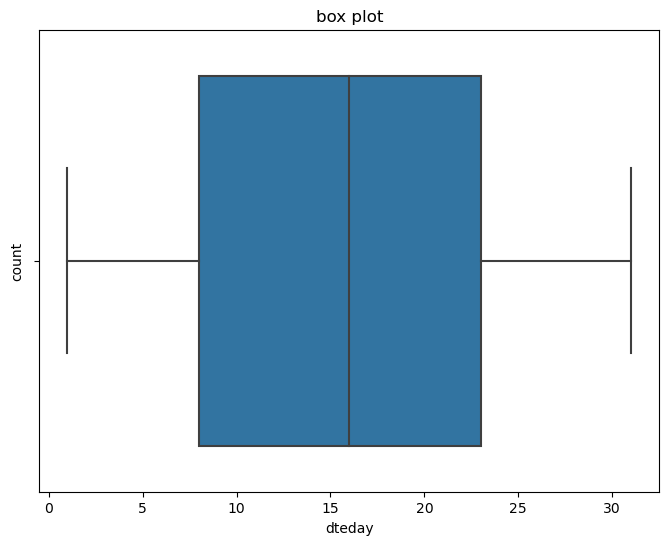

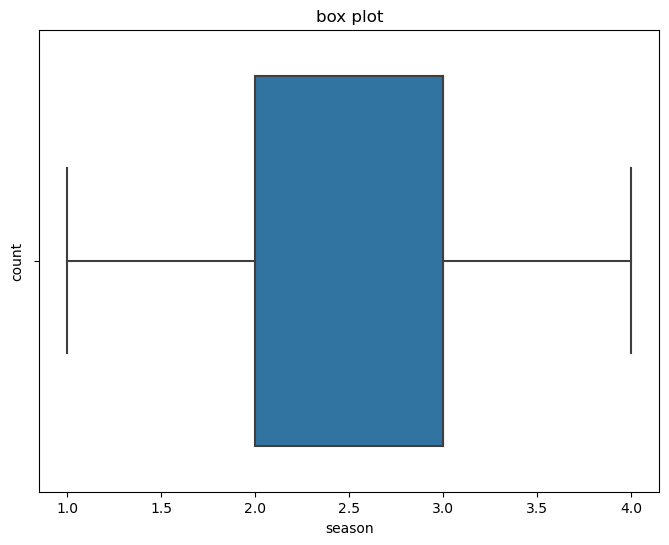

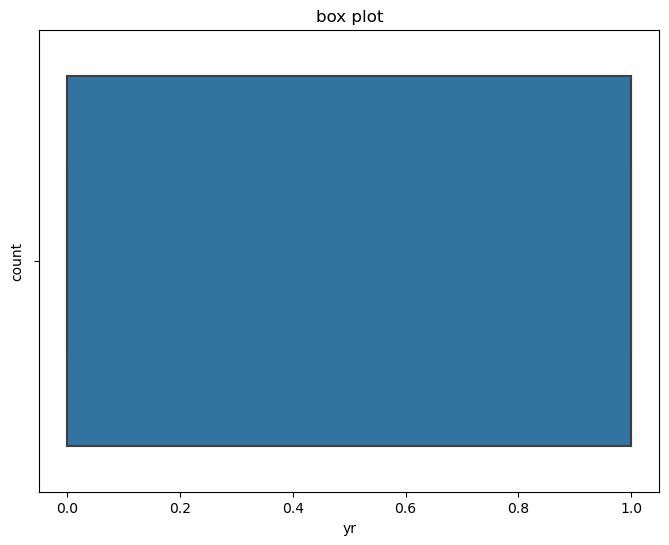

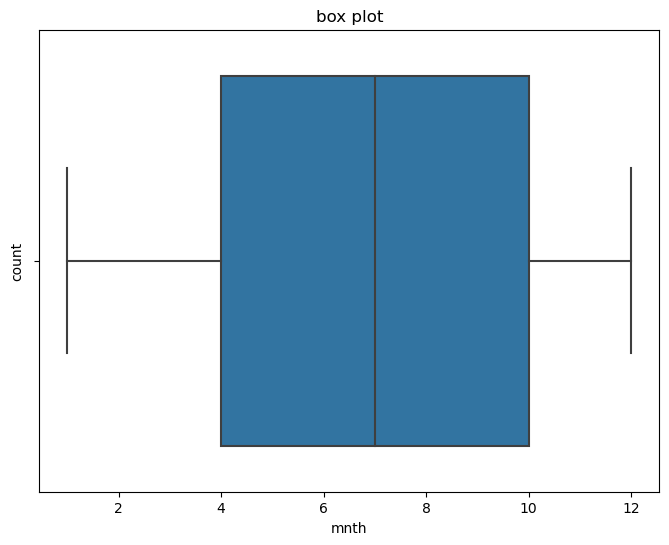

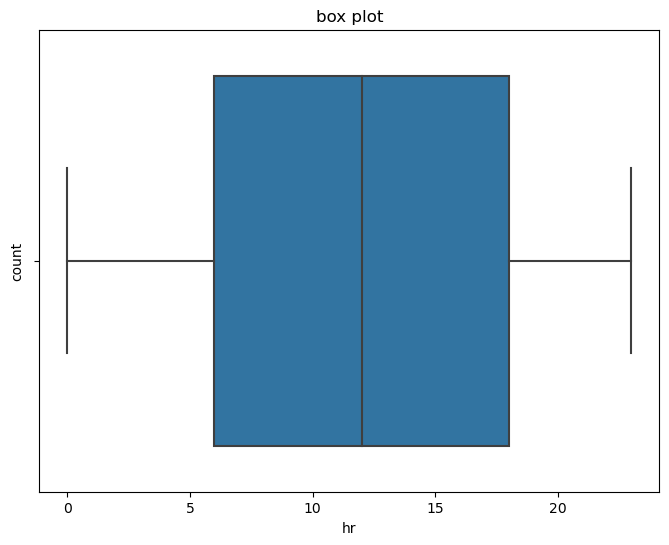

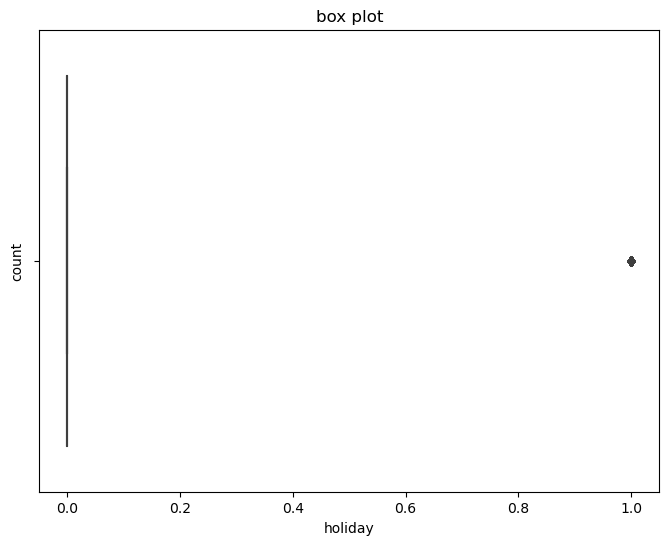

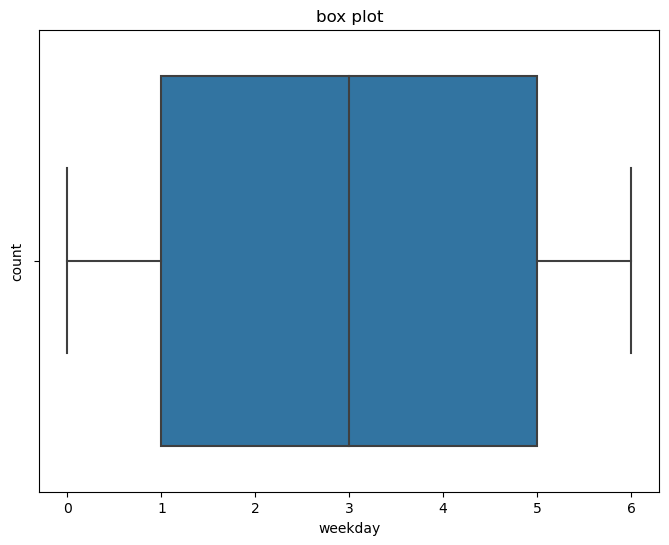

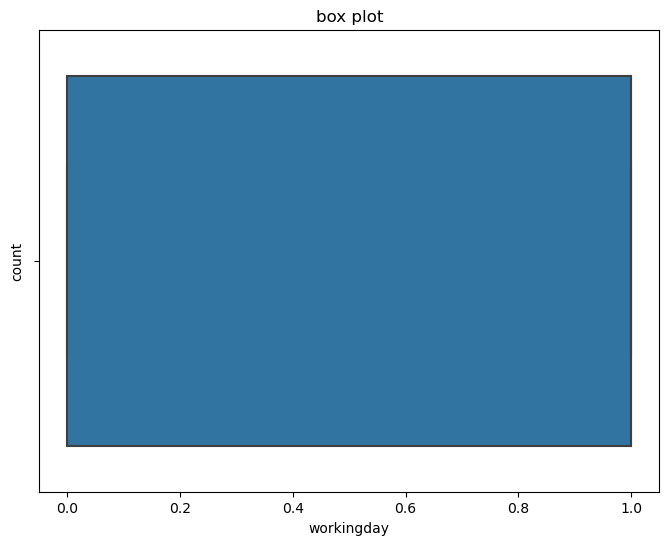

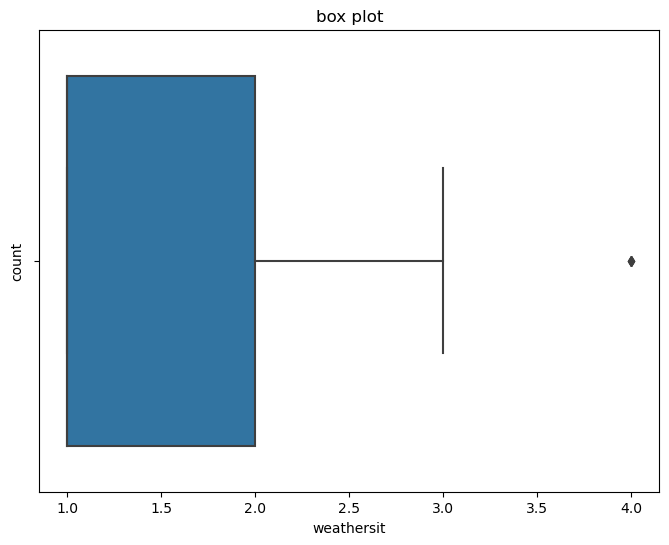

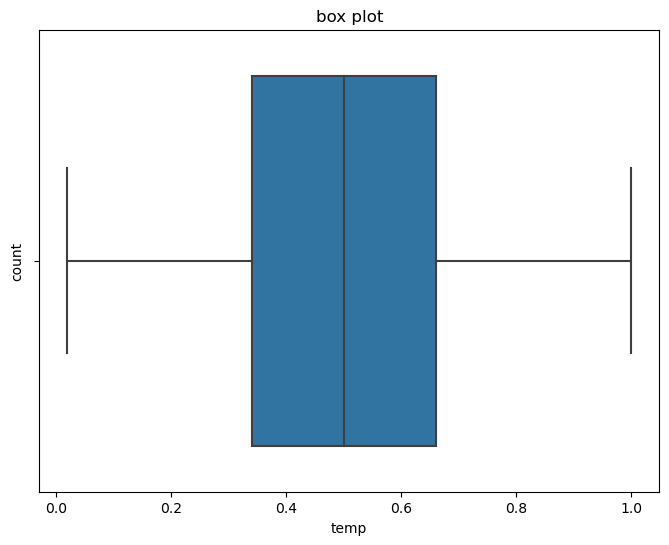

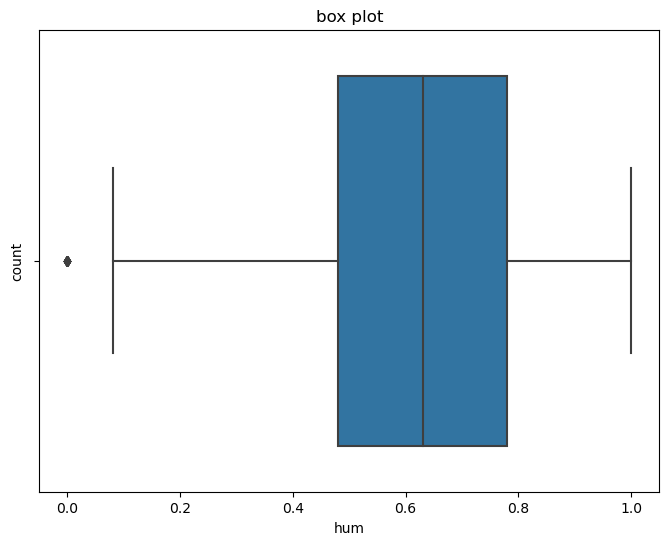

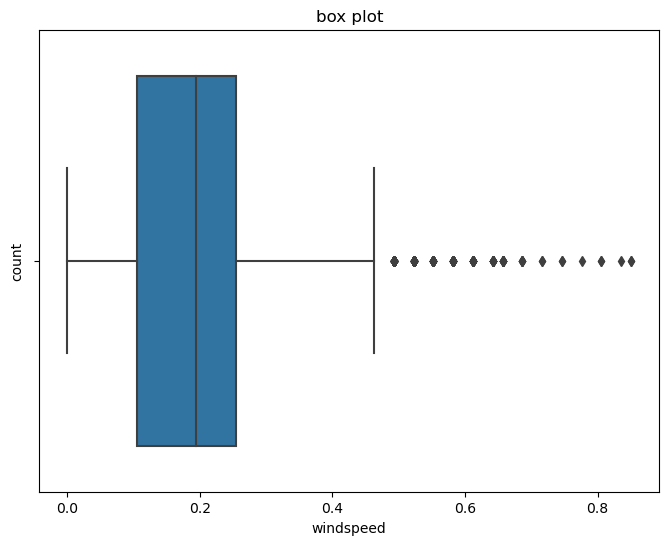

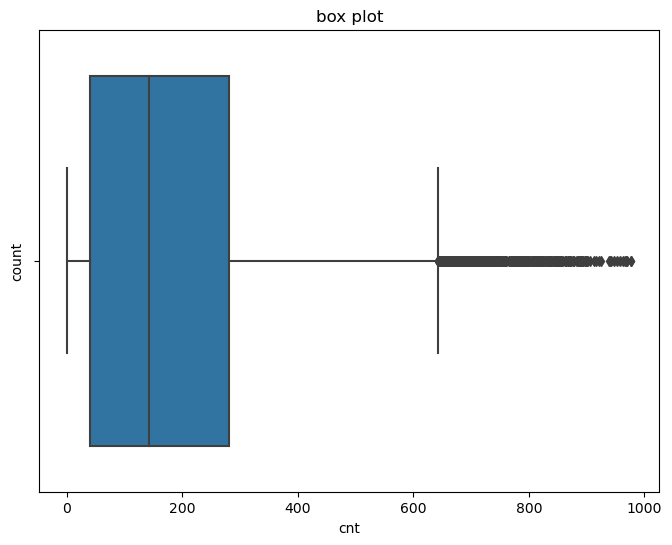

In [30]:
for i in data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data, x=i)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title('box plot')

In [31]:
data.holiday.value_counts()

holiday
0    16879
1      500
Name: count, dtype: int64

## weathersit

In [32]:
# Assuming 'data' is your DataFrame and 'weathersit' is the column with outliers
# Calculate quartile 1 and quartile 3
q1 = data['weathersit'].quantile(0.25)
q3 = data['weathersit'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Identify the outliers using the IQR method
outliers = data[(data['weathersit'] < q1 - 1.5 * iqr) | (data['weathersit'] > q3 + 1.5 * iqr)]

outliers

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
585,26,1,0,1,16,0,3,1,4,0.22,0.93,0.3284,36
8854,9,1,1,1,18,0,1,1,4,0.20,0.86,0.0896,164
9123,21,1,1,1,1,0,6,0,4,0.14,0.86,0.1940,23


In [33]:
data.weathersit.mean()

1.425283387997008

In [34]:
data.loc[[585,8854,9123], 'weathersit'] = 1.42

data.loc[[585,8854,9123]]

In [35]:
data.loc[[585,8854,9123]]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
585,26,1,0,1,16,0,3,1,1.42,0.22,0.93,0.3284,36
8854,9,1,1,1,18,0,1,1,1.42,0.20,0.86,0.0896,164
9123,21,1,1,1,1,0,6,0,1.42,0.14,0.86,0.1940,23


# hum

In [36]:
# Assuming 'data' is your DataFrame and 'hum' is the column with outliers
# Calculate quartile 1 and quartile 3
q1 = data['hum'].quantile(0.25)
q3 = data['hum'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Identify the outliers using the IQR method
outliers = data[(data['hum'] < q1 - 1.5 * iqr) | (data['hum'] > q3 + 1.5 * iqr)]

outliers

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
1551,10,1,0,3,0,0,4,1,3.0,0.34,0.0,0.2537,3
1552,10,1,0,3,1,0,4,1,3.0,0.34,0.0,0.2537,2
1553,10,1,0,3,2,0,4,1,3.0,0.34,0.0,0.2537,1
1554,10,1,0,3,5,0,4,1,3.0,0.36,0.0,0.1940,3
1555,10,1,0,3,6,0,4,1,3.0,0.36,0.0,0.3284,12
1556,10,1,0,3,7,0,4,1,3.0,0.38,0.0,0.2239,37
1557,10,1,0,3,8,0,4,1,3.0,0.38,0.0,0.2836,44
1558,10,1,0,3,9,0,4,1,3.0,0.40,0.0,0.2239,24
1559,10,1,0,3,10,0,4,1,3.0,0.40,0.0,0.1642,17
1560,10,1,0,3,11,0,4,1,3.0,0.40,0.0,0.2537,11


In [37]:
len(outliers)

22

In [38]:
data.hum.median()

0.63

In [39]:
data.loc[1551:1573, 'hum'] = 0.63

In [40]:
data.loc[1551:1573]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
1551,10,1,0,3,0,0,4,1,3.0,0.34,0.63,0.2537,3
1552,10,1,0,3,1,0,4,1,3.0,0.34,0.63,0.2537,2
1553,10,1,0,3,2,0,4,1,3.0,0.34,0.63,0.2537,1
1554,10,1,0,3,5,0,4,1,3.0,0.36,0.63,0.1940,3
1555,10,1,0,3,6,0,4,1,3.0,0.36,0.63,0.3284,12
1556,10,1,0,3,7,0,4,1,3.0,0.38,0.63,0.2239,37
1557,10,1,0,3,8,0,4,1,3.0,0.38,0.63,0.2836,44
1558,10,1,0,3,9,0,4,1,3.0,0.40,0.63,0.2239,24
1559,10,1,0,3,10,0,4,1,3.0,0.40,0.63,0.1642,17
1560,10,1,0,3,11,0,4,1,3.0,0.40,0.63,0.2537,11


<Axes: xlabel='hum'>

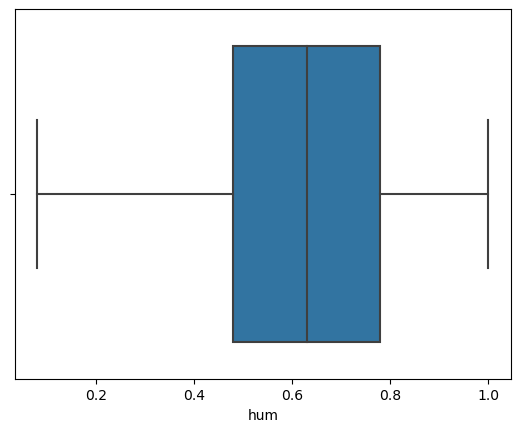

In [41]:
sns.boxplot(data, x=data.hum)

# windspeed

In [42]:
# Assuming 'data' is your DataFrame and 'windspeed' is the column with outliers
# Calculate quartile 1 and quartile 3
q1 = data['windspeed'].quantile(0.25)
q3 = data['windspeed'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Identify the outliers using the IQR method
uutliers = data[(data['windspeed'] < q1 - 1.5 * iqr) | (data['windspeed'] > q3 + 1.5 * iqr)]

uutliers

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
175,8,1,0,1,14,0,6,0,1.0,0.20,0.32,0.4925,95
178,8,1,0,1,17,0,6,0,1.0,0.16,0.37,0.5522,69
194,9,1,0,1,9,0,0,0,1.0,0.12,0.46,0.5224,19
196,9,1,0,1,11,0,0,0,1.0,0.16,0.40,0.5224,49
265,12,1,0,1,12,0,3,1,1.0,0.20,0.47,0.5821,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17327,29,1,1,12,20,0,6,0,2.0,0.30,0.56,0.5522,66
17328,29,1,1,12,21,0,6,0,2.0,0.28,0.56,0.4925,60
17341,30,1,1,12,10,0,0,0,1.0,0.26,0.41,0.5821,122
17343,30,1,1,12,12,0,0,0,1.0,0.28,0.36,0.5821,144


In [43]:
data.windspeed.median()

0.194

In [44]:
uutliers

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
175,8,1,0,1,14,0,6,0,1.0,0.20,0.32,0.4925,95
178,8,1,0,1,17,0,6,0,1.0,0.16,0.37,0.5522,69
194,9,1,0,1,9,0,0,0,1.0,0.12,0.46,0.5224,19
196,9,1,0,1,11,0,0,0,1.0,0.16,0.40,0.5224,49
265,12,1,0,1,12,0,3,1,1.0,0.20,0.47,0.5821,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17327,29,1,1,12,20,0,6,0,2.0,0.30,0.56,0.5522,66
17328,29,1,1,12,21,0,6,0,2.0,0.28,0.56,0.4925,60
17341,30,1,1,12,10,0,0,0,1.0,0.26,0.41,0.5821,122
17343,30,1,1,12,12,0,0,0,1.0,0.28,0.36,0.5821,144


In [45]:
uutliers.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [46]:
data.drop(index=uutliers.index, inplace=True)

In [47]:
data

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1.0,0.24,0.81,0.0000,16
1,1,1,0,1,1,0,6,0,1.0,0.22,0.80,0.0000,40
2,1,1,0,1,2,0,6,0,1.0,0.22,0.80,0.0000,32
3,1,1,0,1,3,0,6,0,1.0,0.24,0.75,0.0000,13
4,1,1,0,1,4,0,6,0,1.0,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,31,1,1,12,19,0,1,1,2.0,0.26,0.60,0.1642,119
17375,31,1,1,12,20,0,1,1,2.0,0.26,0.60,0.1642,89
17376,31,1,1,12,21,0,1,1,1.0,0.26,0.60,0.1642,90
17377,31,1,1,12,22,0,1,1,1.0,0.26,0.56,0.1343,61


In [48]:
# Assuming 'data' is your DataFrame
zero_windspeed_rows = data[data['windspeed'] == 0]
zero_windspeed_rows

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1.0,0.24,0.81,0.0,16
1,1,1,0,1,1,0,6,0,1.0,0.22,0.80,0.0,40
2,1,1,0,1,2,0,6,0,1.0,0.22,0.80,0.0,32
3,1,1,0,1,3,0,6,0,1.0,0.24,0.75,0.0,13
4,1,1,0,1,4,0,6,0,1.0,0.24,0.75,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,29,1,1,12,12,0,6,0,3.0,0.20,1.00,0.0,48
17320,29,1,1,12,13,0,6,0,3.0,0.20,1.00,0.0,84
17322,29,1,1,12,15,0,6,0,2.0,0.24,0.87,0.0,129
17330,29,1,1,12,23,0,6,0,2.0,0.26,0.60,0.0,32


In [49]:
# Replace windspeed values that are 0 with 0.194
data.loc[data['windspeed'] == 0, 'windspeed'] = 0.194


In [50]:
data

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1.0,0.24,0.81,0.1940,16
1,1,1,0,1,1,0,6,0,1.0,0.22,0.80,0.1940,40
2,1,1,0,1,2,0,6,0,1.0,0.22,0.80,0.1940,32
3,1,1,0,1,3,0,6,0,1.0,0.24,0.75,0.1940,13
4,1,1,0,1,4,0,6,0,1.0,0.24,0.75,0.1940,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,31,1,1,12,19,0,1,1,2.0,0.26,0.60,0.1642,119
17375,31,1,1,12,20,0,1,1,2.0,0.26,0.60,0.1642,89
17376,31,1,1,12,21,0,1,1,1.0,0.26,0.60,0.1642,90
17377,31,1,1,12,22,0,1,1,1.0,0.26,0.56,0.1343,61


<Axes: xlabel='windspeed'>

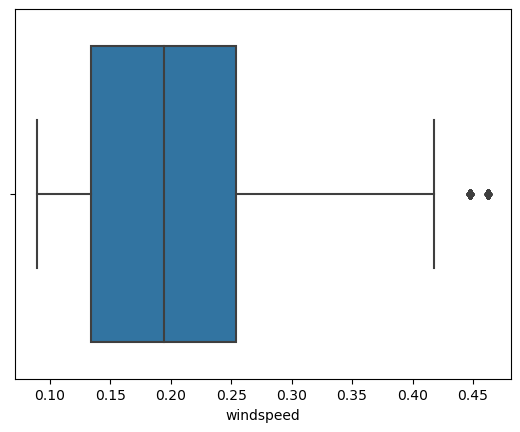

In [51]:
sns.boxplot(data, x=data.windspeed)

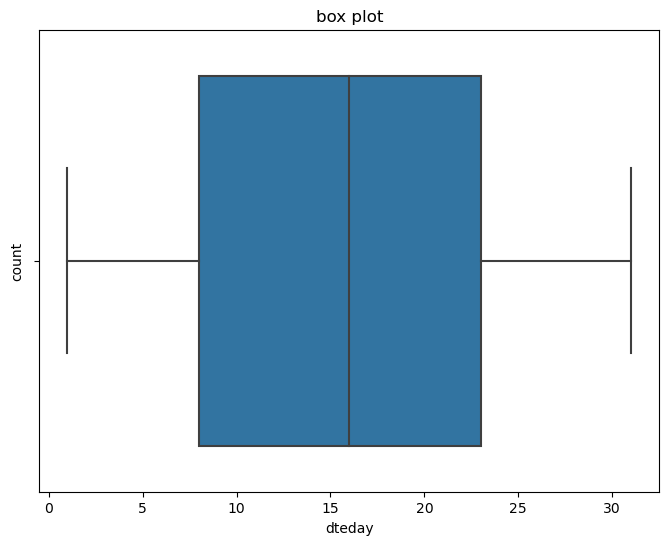

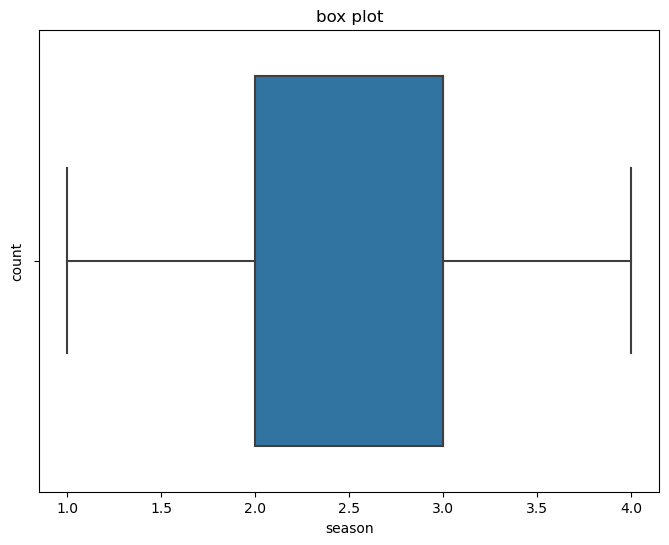

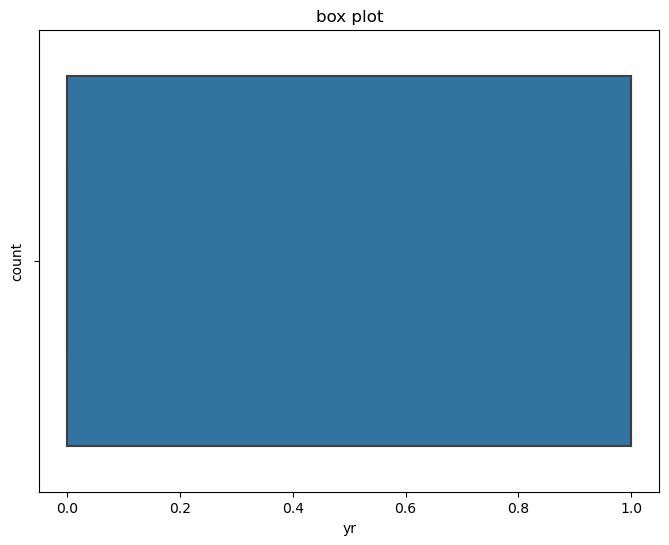

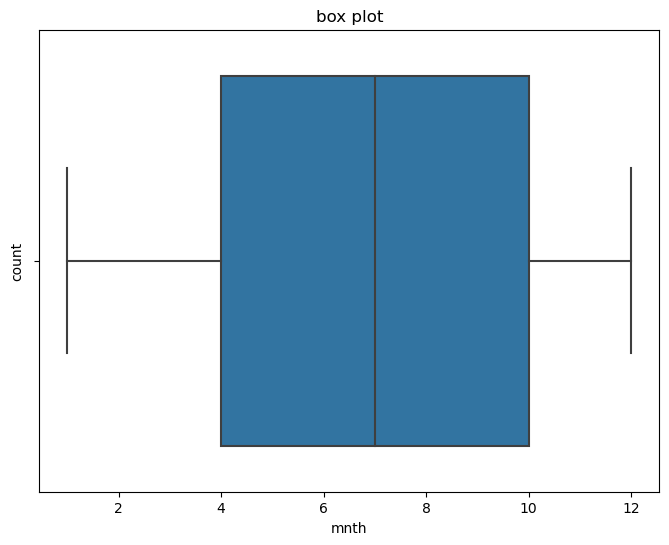

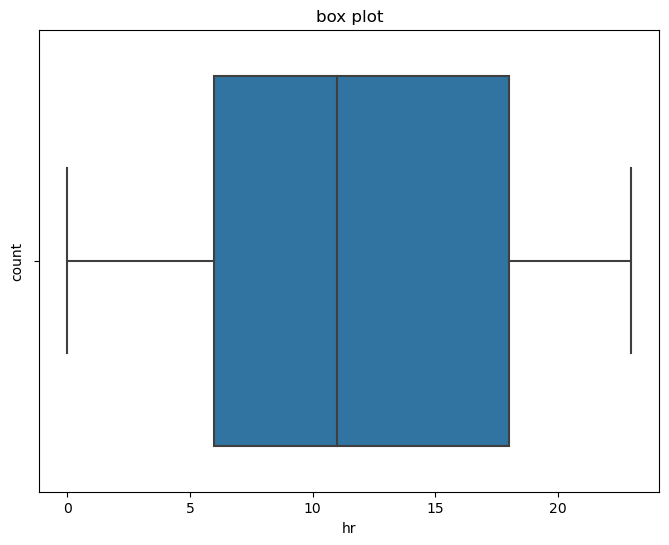

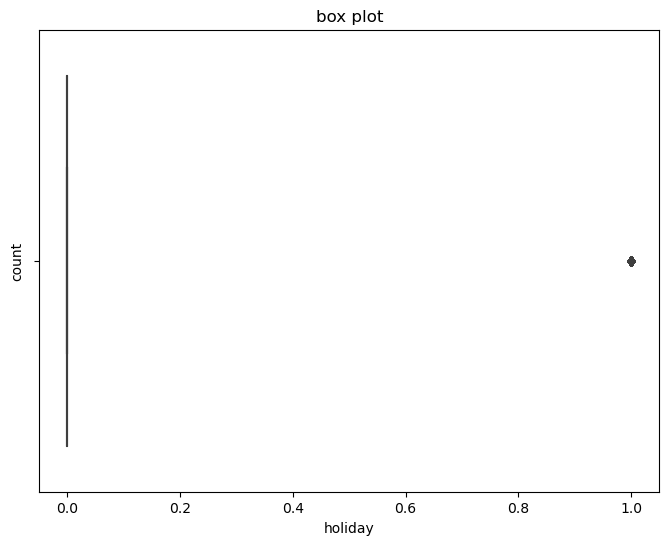

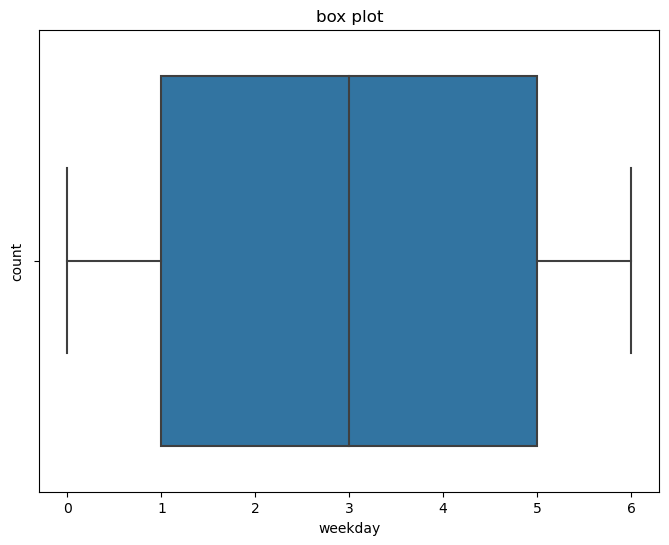

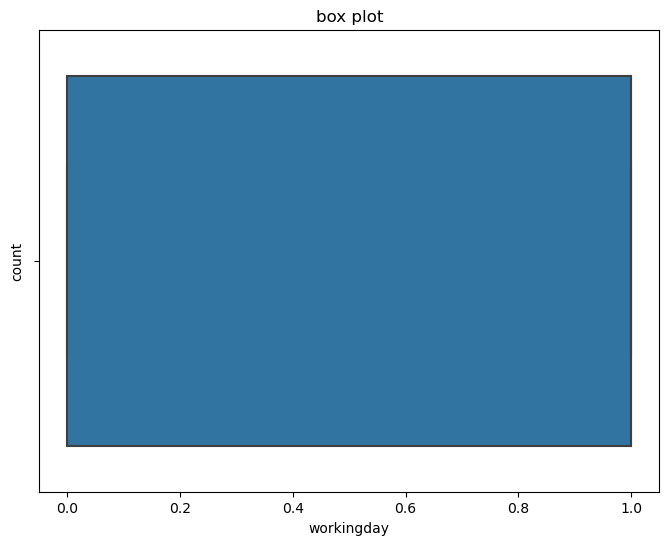

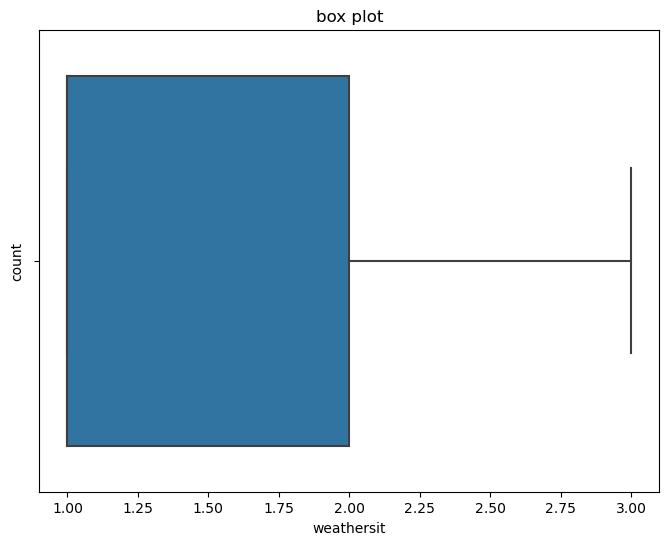

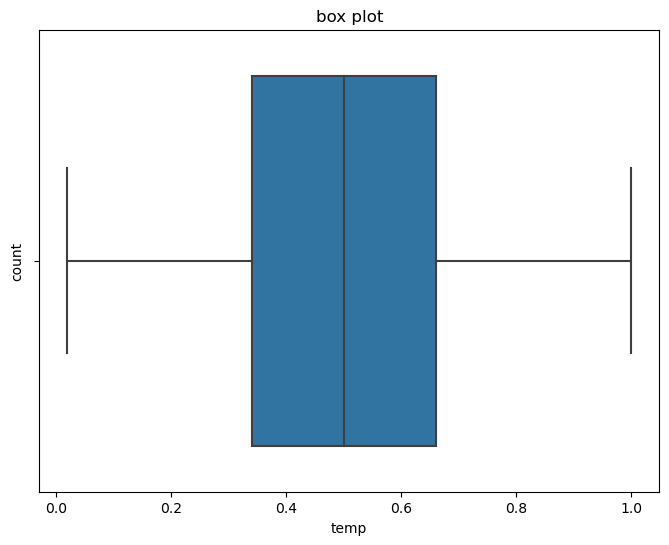

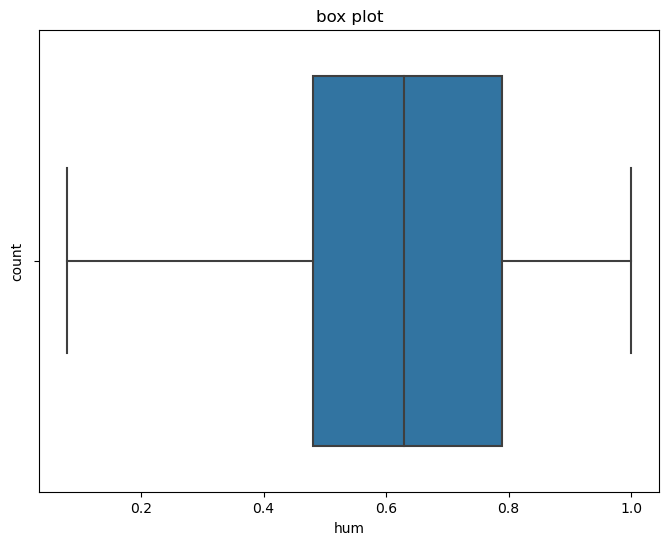

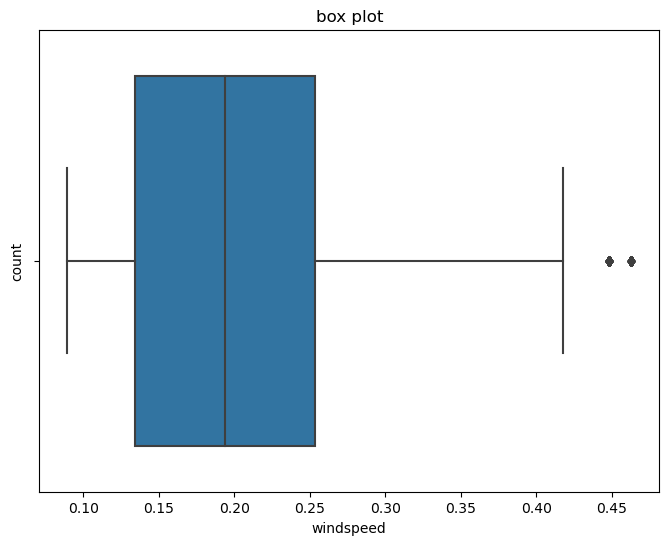

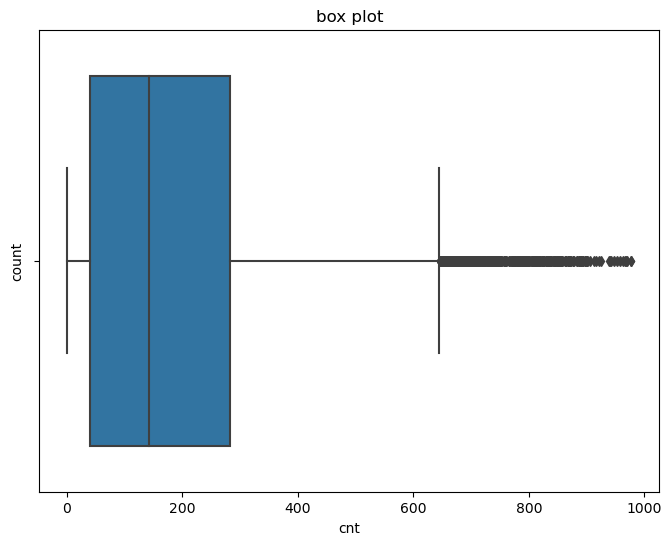

In [52]:
for i in data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data, x=i)
    plt.title('box plot')
    plt.xlabel(i)
    plt.ylabel('count')

# Creatinig dummies

In [53]:
# select the columns 0 to 6
columns_to_encode = data.iloc[:,1:9]

# iterating through each column and create dummy variables
for column in columns_to_encode.columns:
    dummies_variable = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data, dummies_variable], axis=1)

# Drop the original columns after creating dummy variables
data = data.drop(columns_to_encode.columns, axis=1)

In [54]:
data

,dteday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1.0,weathersit_1.42,weathersit_2.0,weathersit_3.0
0,1,0.24,0.81,0.1940,16,True,False,False,False,True,...,False,False,False,True,True,False,True,False,False,False
1,1,0.22,0.80,0.1940,40,True,False,False,False,True,...,False,False,False,True,True,False,True,False,False,False
2,1,0.22,0.80,0.1940,32,True,False,False,False,True,...,False,False,False,True,True,False,True,False,False,False
3,1,0.24,0.75,0.1940,13,True,False,False,False,True,...,False,False,False,True,True,False,True,False,False,False
4,1,0.24,0.75,0.1940,1,True,False,False,False,True,...,False,False,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,31,0.26,0.60,0.1642,119,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
17375,31,0.26,0.60,0.1642,89,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
17376,31,0.26,0.60,0.1642,90,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
17377,31,0.26,0.56,0.1343,61,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [55]:
# changing True and False to 1 and 0 respectively
data.replace({True:1, False:0})

,dteday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1.0,weathersit_1.42,weathersit_2.0,weathersit_3.0
0,1,0.24,0.81,0.1940,16,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
1,1,0.22,0.80,0.1940,40,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
2,1,0.22,0.80,0.1940,32,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
3,1,0.24,0.75,0.1940,13,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
4,1,0.24,0.75,0.1940,1,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,31,0.26,0.60,0.1642,119,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
17375,31,0.26,0.60,0.1642,89,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
17376,31,0.26,0.60,0.1642,90,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
17377,31,0.26,0.56,0.1343,61,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


# separating X and y

In [56]:
X = data.drop('cnt', axis=1)
y = data.cnt

# spitting data

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [58]:
X_train.shape

(13629, 61)

In [59]:
X_test.shape

(3408, 61)

In [60]:
y_train.shape

(13629,)

In [61]:
y_test.shape

(3408,)

In [62]:
data

,dteday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1.0,weathersit_1.42,weathersit_2.0,weathersit_3.0
0,1,0.24,0.81,0.1940,16,True,False,False,False,True,...,False,False,False,True,True,False,True,False,False,False
1,1,0.22,0.80,0.1940,40,True,False,False,False,True,...,False,False,False,True,True,False,True,False,False,False
2,1,0.22,0.80,0.1940,32,True,False,False,False,True,...,False,False,False,True,True,False,True,False,False,False
3,1,0.24,0.75,0.1940,13,True,False,False,False,True,...,False,False,False,True,True,False,True,False,False,False
4,1,0.24,0.75,0.1940,1,True,False,False,False,True,...,False,False,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,31,0.26,0.60,0.1642,119,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
17375,31,0.26,0.60,0.1642,89,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
17376,31,0.26,0.60,0.1642,90,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
17377,31,0.26,0.56,0.1343,61,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


# model creation

## linear regression

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [64]:
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = lr.predict(X_test)

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6838629671452139

## lasso regression

In [67]:
from sklearn.linear_model import Lasso

# Create an instance of Lasso regression model
lasso_model = Lasso(alpha=1.0)  # Set the regularization parameter alpha

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict the target variable for test data
y_pred = lasso_model.predict(X_test)


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_true and y_pred are the true and predicted values, respectively
# Calculate Mean Squared Error (r2)
r2 = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (r2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2 Score):", r_squared)

Mean Squared Error (r2): 11059.121718081422
Mean Absolute Error (MAE): 76.9901508448372
R-squared (R2 Score): 0.6669566461264651


# SVM

In [69]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_true and y_pred are the true and predicted values, respectively
# Calculate Mean Squared Error (r2)
r2 = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (r2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2 Score):", r_squared)

Mean Squared Error (r2): 12470.248176231158
Mean Absolute Error (MAE): 74.89104206081369
R-squared (R2 Score): 0.6244608403706169


# gradient boosting

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Calculate r2_score
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)

r2 score: 0.7924611322436433


# XG Boost

In [72]:
import xgboost as xgb
# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the model to the training data
xg_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg_reg.predict(X_test)

# Calculate r2_score
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)

r2 score: 0.8710103406539963


In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

# Assuming X_train, y_train, X_test, y_test are your training and testing data

# Create Gradient Boosting Regressor object
gb_regressor = GradientBoostingRegressor()

# Define hyperparameters and their values for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=10, scoring='r2', verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_gb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_gb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2_score:", r2)


Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
r2_score: 0.9321454184152891


In [74]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Assuming X_train, y_train, X_test, y_test are your training and testing data

# Create XGBoost Regressor object
xgb_regressor = XGBRegressor()

# Define hyperparameters and their values for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=15, scoring='r2', verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("r2 socre:", r2)


Fitting 15 folds for each of 27 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
r2 socre: 0.9304919208254215


In [75]:
import pandas as pd

# Create the DataFrame
data = {
    'Model': [ 'Linear Regression', 'Lasso Regression', 'SVM', 'Gradient Boosting', 'XG Boost'],
    'Score': [0.68, 0.66, 0.62, 0.93, 0.93]
}

df = pd.DataFrame(data)


In [76]:
df

,Model,Score
0,Linear Regression,0.68
1,Lasso Regression,0.66
2,SVM,0.62
3,Gradient Boosting,0.93
4,XG Boost,0.93
